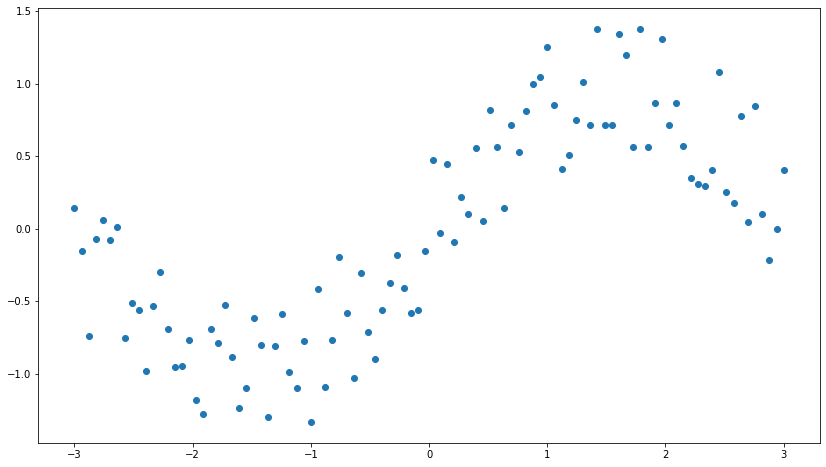

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,8)

n_observations = 100
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys)
plt.show()

In [2]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [3]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [4]:
Y_pred = tf.add(tf.multiply(X, W), b)

In [5]:
loss = tf.square(Y - Y_pred, name='loss')

In [6]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [7]:
n_samples = xs.shape[0]
with tf.Session() as sess:
	# 记得初始化所有变量
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# 训练模型
	for i in range(50):
		total_loss = 0
		for x, y in zip(xs, ys):
			# 通过feed_dic把数据灌进去
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		if i%5 ==0:
			print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# 关闭writer
	writer.close() 
	
	# 取出w和b的值
	W, b = sess.run([W, b]) 

Epoch 0: [0.45985743]
Epoch 5: [0.21071772]
Epoch 10: [0.21071568]
Epoch 15: [0.2107157]
Epoch 20: [0.21071568]
Epoch 25: [0.2107157]
Epoch 30: [0.21071568]
Epoch 35: [0.2107157]
Epoch 40: [0.21071568]
Epoch 45: [0.2107157]


In [8]:
print(W,b)
print("W:"+str(W[0]))
print("b:"+str(b[0]))

[0.20457041] [-0.21209207]
W:0.20457041
b:-0.21209207


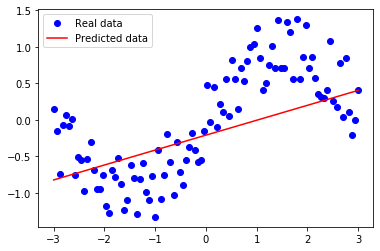

In [9]:
plt.plot(xs, ys, 'bo', label='Real data')
plt.plot(xs, xs * W + b, 'r', label='Predicted data')
plt.legend()
plt.show()